<center>

# **LAB 1**

# **DATA RELATIONSHIP**



</center>

<center>

# **Mục lục** <a name = "TOC"></a>

</center>

- [1. Giới thiệu thành viên](#section1)
- [2. Các thư viện sử dụng](#section2)
- [3. Mô tả dữ liệu](#section3)
- [4. Giới thiệu thuộc tính và ý nghĩa](#section4)
- [5. Xử lý dữ liệu](#section5)
    - [5.1. Đọc dữ liệu vào Dataframe](#section5_1)
    - [5.2. Số dòng và số cột của tập dữ liệu](#section5_2)
    - [5.3. Ý nghĩa của mỗi dòng](#section5_3)
    - [5.4. Kiểm tra các dòng bị trùng lắp](#section5_4)
    - [5.5. Ý nghĩa của mỗi cột](#section5_5)
    - [5.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp](#section5_6)
    - [5.7. Tìm sự phân phối của các cột dữ liệu kiểu số](#section5_7)
    - [5.8. Tìm sự phân phối của các cột dữ liệu phân loại](#section5_8)
    - [5.9. Xử lý các dòng bị thiếu dữ liệu](#section5_9)
- [6. Phân tích dữ liệu](#section6)
    - [6.1. Câu hỏi số 1](#section6_1)
    - [6.2. Câu hỏi số 2](#section6_2)
    - [6.3. Câu hỏi số 3](#section6_3)
    - [6.4. Câu hỏi số 4](#section6_4)
    - [6.5. Câu hỏi số 4](#section6_5)
- [7. Đôi điều về đồ án](#section7)
- [8. Các nguồn tham khảo](#section8)

# **1. Giới thiệu thành viên** <a name = "section1"></a>
[Quay về mục lục](#TOC)

---

# **2. Các thư viện sử dụng** <a name = "section2"></a>
[Quay về mục lục](#TOC)

In [210]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

---

# **3. Mô tả dữ liệu** <a name = "section3"></a>
[Quay về mục lục](#TOC)

---

# **4. Giới thiệu thuộc tính và ý nghĩa** <a name = "section4"></a>
[Quay về mục lục](#TOC)

---

# **5. Xử lý dữ liệu** <a name = "section5"></a>
[Quay về mục lục](#TOC)

## 5.1. Đọc dữ liệu vào Dataframe <a name = "section5_1"></a>
[Quay về mục lục](#TOC)

In [211]:
covid19_df = pd.read_csv('data_2023-03-05/covid19_05_03_2023.csv')
covid19_df.head()

,index,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,NaN,\nNorth America\n,"124,725,126",NaN,"1,612,592",NaN,"120,021,937","+1,529","3,090,597","7,892",...,NaN,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN
1,NaN,\nAsia\n,"214,494,303","+19,555","1,537,456",125.0,"199,126,511","+17,607","13,830,336","15,479",...,NaN,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN
2,NaN,\nEurope\n,"246,578,283","+18,461","2,019,397",48.0,"242,121,931","+24,102","2,436,955","6,475",...,NaN,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN
3,NaN,\nSouth America\n,"68,046,073",+167,"1,350,933",8.0,"66,293,956",+111,"401,184","10,185",...,NaN,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN
4,NaN,\nOceania\n,"14,015,805",NaN,"26,203",NaN,"13,852,354",NaN,"137,248",55,...,NaN,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN


In [212]:
def preprocess(df):
    df.drop(columns=df.columns[0], axis=1,  inplace=True)
    df['country_other'] = df['country_other'].str.strip()
    df = df[df['country_other']!='']
    df_ = df.copy()
    df_.replace(to_replace = r'\D',value = '',regex=True,inplace = True)
    df_.iloc[:,0] = df.iloc[:,0]
    df_['continent'] = df['continent']
    return df_

In [213]:
covid19_df = preprocess(covid19_df)
covid19_df['continent']

0          North America
1                   Asia
2                 Europe
3          South America
4      Australia/Oceania
             ...        
242        South America
243    Australia/Oceania
244               Africa
245                  NaN
246                  All
Name: continent, Length: 246, dtype: object

## 5.2. Số dòng và số cột của tập dữ liệu <a name = "section5_2"></a>
[Quay về mục lục](#TOC)

In [214]:
row = covid19_df.shape[0]
col = covid19_df.shape[1]
print('Số dòng:', row)
print('Số cột', col)

Số dòng: 246
Số cột 21


## 5.3. Ý nghĩa của mỗi dòng <a name = "section5_3"></a>
[Quay về mục lục](#TOC)

## 5.4. Kiểm tra các dòng bị trùng lắp <a name = "section5_4"></a>
[Quay về mục lục](#TOC)

In [215]:
duplicated = covid19_df.duplicated()
pd.DataFrame(covid19_df[duplicated==True])

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop


## 5.5. Ý nghĩa của mỗi cột <a name = "section5_5"></a>
[Quay về mục lục](#TOC)

## 5.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp <a name = "section5_6"></a>
[Quay về mục lục](#TOC)

In [216]:
covid19_df.dtypes

country_other           object
totalcases              object
newcases                object
totaldeaths             object
newdeaths              float64
totalrecovered          object
newrecovered            object
activecases             object
serious_critical        object
tot_cases_1m_pop        object
deaths_1m_pop           object
totaltests              object
tests_1m_pop            object
population              object
continent               object
1_caseevery_x_ppl       object
1_deathevery_x_ppl      object
1_testevery_x_ppl      float64
new_cases_1m_pop       float64
new_deaths_1m_pop      float64
active_cases_1m_pop     object
dtype: object

## 5.7. Tìm sự phân phối của các cột dữ liệu kiểu số <a name = "section5_7"></a>
[Quay về mục lục](#TOC)

## 5.8. Tìm sự phân phối của các cột dữ liệu phân loại <a name = "section5_8"></a>
[Quay về mục lục](#TOC)

## 5.9. Xử lý các dòng bị thiếu dữ liệu <a name = "section5_9"></a>
[Quay về mục lục](#TOC)

---

# **6. Phân tích dữ liệu** <a name = "section6"></a>
[Quay về mục lục](#TOC)

## 6.1. Câu hỏi số 1 <a name = "section6_1"></a>
[Quay về mục lục](#TOC)

## 6.2. Câu hỏi số 2 <a name = "section6_2"></a>
[Quay về mục lục](#TOC)

## 6.3. Câu hỏi số 3 <a name = "section6_3"></a>
[Quay về mục lục](#TOC)

## 6.4. Câu hỏi số 4 <a name = "section6_4"></a>
[Quay về mục lục](#TOC)

In [217]:

df = covid19_df[covid19_df['country_other'] == 'Total:'].reset_index()
df['totalcases'] = df['totalcases'].astype('float')
df['totaldeaths'] = df['totaldeaths'].astype('float')
df['totalrecovered'] = df['totalrecovered'].astype('float')
df['activecases'] = df['activecases'].astype('float')
df

,index,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,239,Total:,124725126.0,NaN,1612592.0,NaN,120021937.0,NaN,3090597.0,7892,...,NaN,NaN,NaN,North America,,NaN,NaN,NaN,NaN,NaN
1,240,Total:,214494303.0,19555,1537456.0,125.0,199126511.0,17607,13830336.0,15479,...,NaN,NaN,NaN,Asia,,NaN,NaN,NaN,NaN,NaN
2,241,Total:,246578283.0,18461,2019397.0,48.0,242121931.0,24102,2436955.0,6475,...,NaN,NaN,NaN,Europe,,NaN,NaN,NaN,NaN,NaN
3,242,Total:,68046073.0,167,1350933.0,8.0,66293956.0,111,401184.0,10185,...,NaN,NaN,NaN,South America,,NaN,NaN,NaN,NaN,NaN
4,243,Total:,14015805.0,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
5,244,Total:,12796416.0,12,258590.0,NaN,12076475.0,NaN,461351.0,548,...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
6,245,Total:,721.0,NaN,15.0,NaN,706.0,NaN,0.0,0,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
7,246,Total:,680656727.0,38195,6805186.0,181.0,653493870.0,43375,20357671.0,40634,...,NaN,NaN,NaN,All,,NaN,NaN,NaN,NaN,NaN


In [218]:
df_world = df[df['continent']=='All' ]
df_world = df_world[['totalcases','totaldeaths', 'totalrecovered', 'activecases']].rename(index={7: "num"})
df_world = df_world.T
df_world

,num
totalcases,680656727.0
totaldeaths,6805186.0
totalrecovered,653493870.0
activecases,20357671.0


In [219]:
df_world['percent'] = (df_world['num'] / df_world['num'][0]) *100
df_world

,num,percent
totalcases,680656727.0,100.000000
totaldeaths,6805186.0,0.999797
totalrecovered,653493870.0,96.009316
activecases,20357671.0,2.990887


In [220]:
df['percent1'] = (df['totalrecovered'] / df['totalrecovered'].loc[7]) *100
df['percent2'] = (df['totaldeaths'] / df['totaldeaths'].loc[7]) *100
df['percent3'] = (df['activecases'] / df['activecases'].loc[7]) *100
df['percent1']

0     18.366192
1     30.471060
2     37.050375
3     10.144541
4      2.119737
5      1.847986
6      0.000108
7    100.000000
Name: percent1, dtype: float64

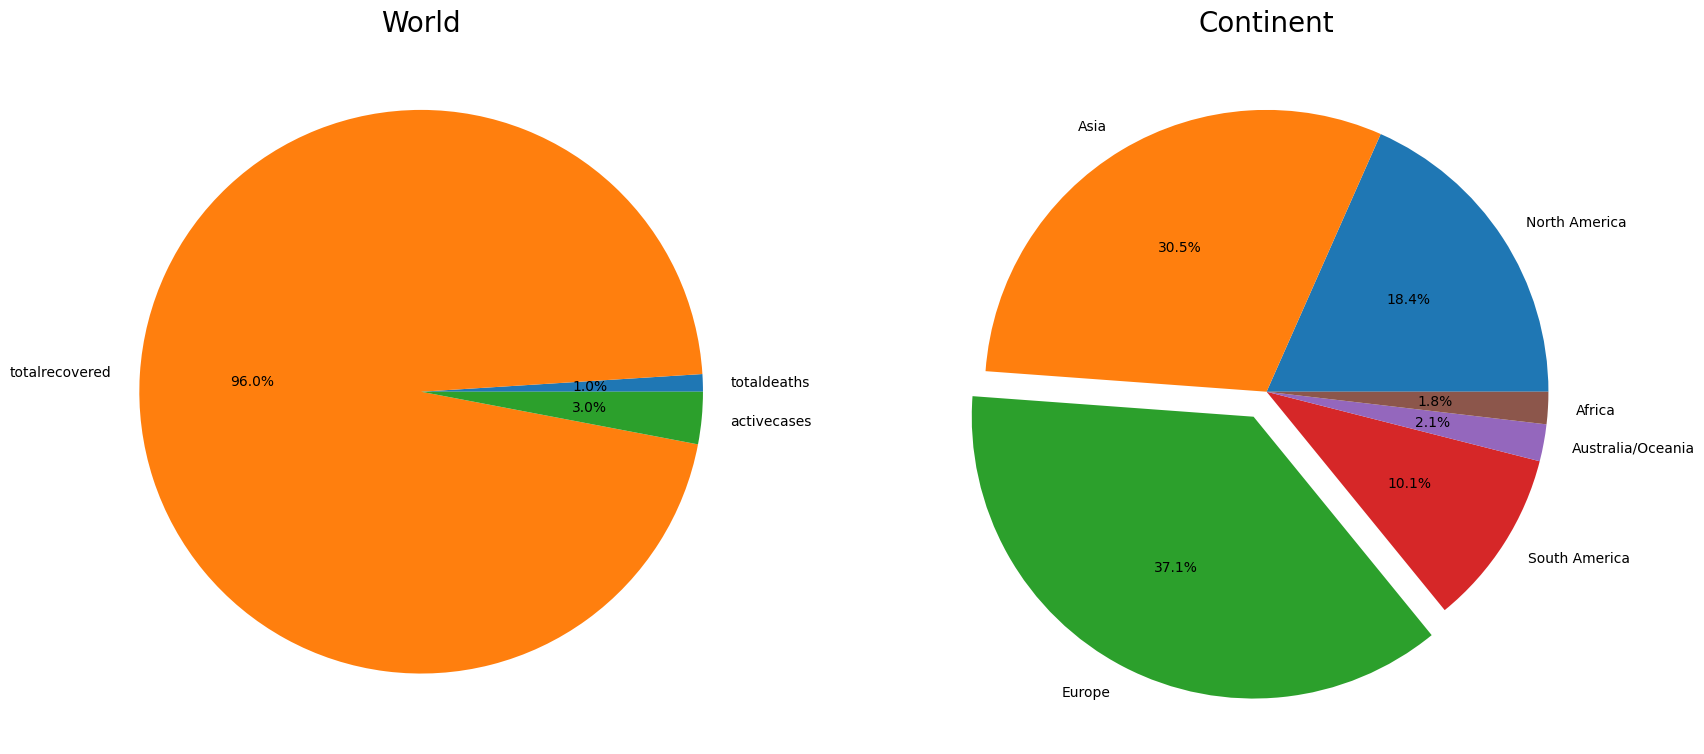

In [221]:
explode = (0,0,0.1,0,0,0)
lables = ['totaldeaths', 'totalrecovered', 'activecases']
fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].set_title("World", fontsize=20)
ax[0].pie(df_world['percent'][1:] , labels = lables, autopct='%1.1f%%');
ax[1].set_title("Continent", fontsize=20)
ax[1].pie(df['percent1'].loc[:5] , labels = df['continent'].loc[:5], explode=explode, autopct='%1.1f%%');

- Từ biểu đồ trái, ta thấy được:
    - Số ca hồi phục chiếm phầm trăm cao nhất trong biểu đồ, điều đó cho chứng mình rằng y tế được cải thiện rất nhiều so với những năm trước với 96%. 
    - Còn lại là đang hồi phục chiếm tỉ trọng là 3%.
    - 1% là tỉ lệ không thể cứu chữa được.
- Ở biểu đồ bên phải là biểu đồ đi sâu vào phần độ hồi phục của từng châu lục, ta thấy các nước ở Asia, North America, Europe chiếm tỉ trọng cũng khá cao, lần luợt là: 30.5%, 18.4% và 37.1%, còn lại là các nước thuộc châu lục khác.


## 6.5. Câu hỏi số 5 <a name = "section6_5"></a>
[Quay về mục lục](#TOC)

---

# **7. Đôi điều về đồ án** <a name = "section7"></a>
[Quay về mục lục](#TOC)

---

# **8. Nguồn tham khảo** <a name = "section8"></a>
[Quay về mục lục](#TOC)